## Topic: OpenMP Library
## Name: M.Vineeth
## Enrol: E18CSE095
## Batch: EB03

Serial to Parallel (utilizing parallel-for loops)
Utilize the OpenMP library in Python to speed up the serial for-loop computation by
converting them into parallel for loops.


## Serial Implementation and Parallel for Loop Implementation using OpenMP

In [1]:
# matrix multiplication - serial implementation
%%time 
import numpy as np
import time
np.random.seed(1)

mat1 = np.random.rand(30, 20)
mat2 = np.random.rand(20, 50)
result = np.zeros([mat1.shape[0],mat2.shape[1]], dtype = np.float64)

print("shape of mat1: ", mat1.shape)
print("shape of mat2: ", mat2.shape)
print(mat1[0])


start = time.time()
for i in range(mat1.shape[0]):
  for j in range(mat2.shape[1]):
    for k in range(mat2.shape[0]):
      result[i][j] += mat1[i][k] * mat2[k][j]

total_time = time.time() - start
print("time taken: ", total_time)
print("result matrix shape: ", result.shape)
print("first row of result: \n", result[0])

shape of mat1:  (30, 20)
shape of mat2:  (20, 50)
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01]
time taken:  0.05060243606567383
result matrix shape:  (30, 50)
first row of result: 
 [3.02269559 4.57581511 3.86173184 2.5573084  3.6098011  4.20839179
 4.22385131 3.11052628 3.70097018 3.63020725 3.55706345 4.27130746
 3.6383437  3.71267705 2.4043966  4.07810538 3.5324224  3.24021633
 4.06919701 3.09076641 3.32797594 3.9258675  2.49352572 3.6524059
 3.68322915 4.17076267 2.99451748 3.4807555  3.74962345 4.17722625
 3.06288689 3.79894045 3.74848052 3.87643154 4.70571973 2.67707038
 4.38087656 3.24747753 2.71722556 5.19740323 3.47500493 4.01089589
 3.88922239 3.79734004 3.95146529 4.7581368  3.94470327 3.72455398
 4.59828984 3.781453  

## Setting up Python openMP

In [2]:
!pip install pymp-pypi

In [10]:
# checking for the number of cores
with pymp.Parallel() as p:
  p.print(p.num_threads, p.thread_num)

2 1
2 0


In [ ]:
# sample code: python
import pymp
from __future__ import print_function
 
ex_array = np.zeros((100,), dtype='uint8')
for index in range(0, 100):
    ex_array[index] = 1
    print('Yay! {} done!'.format(index))

In [ ]:
# parallel for loop for the above code
from __future__ import print_function
 
ex_array = pymp.shared.array((100,), dtype='uint8')
with pymp.Parallel(4) as p:
    for index in p.range(0, 100):
        ex_array[index] = 1
        # The parallel print function takes care of asynchronous output.
        p.print('Yay! {} done!'.format(index))

In [5]:
# matrix multiplication - parallel implementation

def multiply(X, Y):
  # create the shared variable
  result = pymp.shared.array((X.shape[0], Y.shape[1]), dtype = "float64")
  with pymp.Parallel(2) as p:
    for i in p.range(len(Y[0])):
      for j in p.range(len(Y)):
        result[0][i] += X[0] * Y[j][i]

In [6]:
%%time
import numpy as np
import time
np.random.seed(1)

mat1 = np.random.rand(30, 20)
mat2 = np.random.rand(20, 50)
#result = np.zeros([mat1.shape[0],mat2.shape[1]], dtype = np.float64)

print("shape of mat1: ", mat1.shape)
print("shape of mat2: ", mat2.shape)
print(mat1[0])


start = time.time()
for i in range(mat1.shape[1]):
  multiply(mat1[i], mat2)

total_time = time.time() - start
print("time taken: ", total_time)
print("result matrix shape: ", result.shape)
print("first row of result: \n", result[0])

shape of mat1:  (30, 20)
shape of mat2:  (20, 50)
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01 9.23385948e-02 1.86260211e-01 3.45560727e-01
 3.96767474e-01 5.38816734e-01 4.19194514e-01 6.85219500e-01
 2.04452250e-01 8.78117436e-01 2.73875932e-02 6.70467510e-01
 4.17304802e-01 5.58689828e-01 1.40386939e-01 1.98101489e-01]
time taken:  0.7928166389465332
result matrix shape:  (30, 50)
first row of result: 
 [3.02269559 4.57581511 3.86173184 2.5573084  3.6098011  4.20839179
 4.22385131 3.11052628 3.70097018 3.63020725 3.55706345 4.27130746
 3.6383437  3.71267705 2.4043966  4.07810538 3.5324224  3.24021633
 4.06919701 3.09076641 3.32797594 3.9258675  2.49352572 3.6524059
 3.68322915 4.17076267 2.99451748 3.4807555  3.74962345 4.17722625
 3.06288689 3.79894045 3.74848052 3.87643154 4.70571973 2.67707038
 4.38087656 3.24747753 2.71722556 5.19740323 3.47500493 4.01089589
 3.88922239 3.79734004 3.95146529 4.7581368  3.94470327 3.72455398
 4.59828984 3.781453  ]

In [7]:
# linear search - serial implementation
%%time
import time
import numpy as np
np.random.seed(1)
arr = np.random.randint(10000, size = (1000))
print("shape of the array: ", arr.shape)
print("last elements of the array: ", arr[989:])

ind = []
key = arr[990] # element to be searched
start = time.time()
for i in range(len(arr)):
  if(arr[i] == key):
    ind.append(i)
total_time = time.time() - start
print("element to be searched: ", key)
if(len(ind) == 0):
  print("element not found")
else:
  print("element found at index: ", ind)
print("total time: ", total_time)

shape of the array:  (1000,)
last elements of the array:  [ 868 3629 4745 8152 8238  633 4666 6165 1280 5973 6171]
element to be searched:  3629
element found at index:  [740, 990]
total time:  0.0004055500030517578
CPU times: user 1.52 ms, sys: 1.08 ms, total: 2.6 ms
Wall time: 2.7 ms


In [11]:
# linear search - parallel implementation
%%time
import time
import numpy as np
np.random.seed(1)
arr = np.random.randint(10000, size = (1000))
print("shape of the array: ", arr.shape)
print("last elements of the array: ", arr[989:])

# shared resource list
ind = pymp.shared.list()

key = arr[990] # element to be searched
start = time.time()
# only the below section needs to be modified
#-----------------------------------------------------------------
with pymp.Parallel() as p:
  for i in p.range(0, len(arr)):
    if(arr[i] == key):
      ind.append(i)
#----------------------------------------------------------------
total_time = time.time() - start
print("element to be searched: ", key)

if(len(ind) == 0):
  print("element not found")
else:
  print("element found at index: ", ind)
print("total time: ", total_time)

shape of the array:  (1000,)
last elements of the array:  [ 868 3629 4745 8152 8238  633 4666 6165 1280 5973 6171]
element to be searched:  3629
element found at index:  [740, 990]
total time:  0.035648345947265625
CPU times: user 8.16 ms, sys: 14.6 ms, total: 22.8 ms
Wall time: 50.3 ms


In [12]:
# array sum - serial implementation
%%time
import time
import numpy as np
np.random.seed(1)
arr = np.random.randint(10000, size = (1000))
print("shape of the array: ", arr.shape)
print("first 10 elements of the array: ", arr[:10])

sum = 0
start = time.time()
for i in arr:
  sum += i
total_time = time.time() - start
print("array sum = ", sum)
print("total time: ", total_time)

shape of the array:  (1000,)
first 10 elements of the array:  [ 235 5192  905 7813 2895 5056  144 4225 7751 3462]
array sum =  4960055
total time:  0.0002753734588623047
CPU times: user 881 µs, sys: 664 µs, total: 1.54 ms
Wall time: 1.33 ms


In [13]:
# array sum - parallel implementation
%%time
import time
import numpy as np
np.random.seed(1)
arr = np.random.randint(10000, size = (1000))
print("shape of the array: ", arr.shape)
print("first 10 elements of the array: ", arr[:10])

sum = 0
shared_arr = pymp.shared.list(arr)
start = time.time()
with pymp.Parallel() as p:
  for i in shared_arr:
    sum += i
total_time = time.time() - start
print("array sum = ", sum)
print("total time: ", total_time)

shape of the array:  (1000,)
first 10 elements of the array:  [ 235 5192  905 7813 2895 5056  144 4225 7751 3462]
array sum =  4960055
total time:  0.1605701446533203
CPU times: user 49.6 ms, sys: 17.4 ms, total: 67 ms
Wall time: 170 ms


In [14]:
# prime numbers - serial implementation
def findPrimes(n):
  for i in range(2, n + 1):
    flag = 1
    for j in range(2, i):
      if(i % j == 0):
        flag = 0
        break
    
    if(flag):
      results.append(i) 

In [18]:
%%time
results = []

n = 10000
start = time.time()
findPrimes(n)
total_time = time.time() - start

print("total time: ", total_time)
print("prime numbers: ", results[-10:])

total time:  0.4300394058227539
prime numbers:  [9887, 9901, 9907, 9923, 9929, 9931, 9941, 9949, 9967, 9973]
CPU times: user 426 ms, sys: 0 ns, total: 426 ms
Wall time: 431 ms


In [16]:
# prime numbers - parallel implementation
def findPrimes_parallel(n):
  with pymp.Parallel() as p:
    for i in p.range(2, n + 1):
      flag = 1
      for j in range(2, i):
        if(i % j == 0):
          flag = 0
          break
      
      if(flag):
        results.append(i) 

In [19]:
%%time
results = pymp.shared.list()

n = 10000
start = time.time()
findPrimes_parallel(n)
total_time = time.time() - start

print("total time: ", total_time)
print("prime numbers: ", results[-10:])

total time:  0.49069762229919434
prime numbers:  [9887, 9901, 9907, 9923, 9929, 9931, 9941, 9949, 9967, 9973]
CPU times: user 238 ms, sys: 11.2 ms, total: 250 ms
Wall time: 501 ms


In [20]:
# primes in a power set - serial implementation
# generate all the subsets
def generate_subsets(arr, powerset):
    ind = 0
    for i in range(pow(2, len(arr))):
        j = 0
        temp = i
        subset = list()
        while(temp):
            if(temp & 1):
                subset.append(arr[j])
            j += 1
            temp = temp >> 1
        
        powerset.append(tuple(subset))                

In [21]:
# checking for prime
def isPrime(num):
  for i in range(2, int(num)):
    if(num % i == 0):
      return False
  if(num != 1):
    return True
  return False

In [22]:
# sanity check
print(isPrime(18))
print(isPrime(37))
print(isPrime(1))

False
True
False


In [24]:
# select prime subsets
def prime_subsets(powerset):
  for s in powerset:
    if(np.sum(s) != 0.0 and isPrime(np.sum(s))):
      primeset.append(s)

In [25]:
# sample test case for n = 3

import numpy as np

n = 3
arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = list()

start = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = []
total_time = time.time() - start
prime_subsets(powerset)
print("len of primeset: ", len(primeset))
print("primeset: \n", primeset)
print("time taken: ", round(total_time, 5))

(3,)
[1 2 3]
len of powerset:  8
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3)]
len of primeset:  4
primeset: 
 [(2,), (1, 2), (3,), (2, 3)]
time taken:  0.00154


In [26]:
# n = 15
import numpy as np
import threading

n = 15
arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = list()

start = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = list()
prime_subsets(powerset)

total_time = time.time() - start
print("len of primeset: ", len(primeset))
print("primeset: \n", primeset)
print("time taken: ", round(total_time, 5))

(15,)
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]
len of powerset:  32768
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3), (4,), (1, 4), (2, 4), (1, 2, 4), (3, 4), (1, 3, 4), (2, 3, 4), (1, 2, 3, 4), (5,), (1, 5), (2, 5), (1, 2, 5), (3, 5), (1, 3, 5), (2, 3, 5), (1, 2, 3, 5), (4, 5), (1, 4, 5), (2, 4, 5), (1, 2, 4, 5), (3, 4, 5), (1, 3, 4, 5), (2, 3, 4, 5), (1, 2, 3, 4, 5), (6,), (1, 6), (2, 6), (1, 2, 6), (3, 6), (1, 3, 6), (2, 3, 6), (1, 2, 3, 6), (4, 6), (1, 4, 6), (2, 4, 6), (1, 2, 4, 6), (3, 4, 6), (1, 3, 4, 6), (2, 3, 4, 6), (1, 2, 3, 4, 6), (5, 6), (1, 5, 6), (2, 5, 6), (1, 2, 5, 6), (3, 5, 6), (1, 3, 5, 6), (2, 3, 5, 6), (1, 2, 3, 5, 6), (4, 5, 6), (1, 4, 5, 6), (2, 4, 5, 6), (1, 2, 4, 5, 6), (3, 4, 5, 6), (1, 3, 4, 5, 6), (2, 3, 4, 5, 6), (1, 2, 3, 4, 5, 6), (7,), (1, 7), (2, 7), (1, 2, 7), (3, 7), (1, 3, 7), (2, 3, 7), (1, 2, 3, 7), (4, 7), (1, 4, 7), (2, 4, 7), (1, 2, 4, 7), (3, 4, 7), (1, 3, 4, 7), (2, 3, 4, 7), (1, 2, 3, 4, 7), (5, 7), (1, 5, 7), (2

In [31]:
# primes in a power set - parallel implementation
# generate all the subsets
def generate_subsets(arr, powerset):
    ind = 0
    with pymp.Parallel() as p:
      for i in p.range(pow(2, len(arr))):
          j = 0
          temp = i
          subset = list()
          while(temp):
              if(temp & 1):
                  subset.append(arr[j])
              j += 1
              temp = temp >> 1
          
          powerset.append(tuple(subset))  

In [28]:
# checking for prime
def isPrime(num):
  with pymp.Parallel() as p:
    for i in p.range(2, int(num)):
      if(num % i == 0):
        return False
    if(num != 1):
      return True
    return False

In [45]:
# select prime subsets
def prime_subsets(powerset):
  for s in powerset:
    if(np.sum(s) != 0.0 and isPrime(np.sum(s))):
      primeset.append(s)

In [47]:
# n = 3
import numpy as np
import threading

n = 3
arr = np.arange(1, n + 1)
print(arr.shape)
print(arr)

powerset = pymp.shared.list()

start = time.time()
generate_subsets(arr, powerset)
print("len of powerset: ", len(powerset))
print("powerset: \n", powerset)

primeset = pymp.shared.list()
prime_subsets(powerset)

total_time = time.time() - start
print("len of primeset: ", len(primeset))
print("primeset: \n", primeset)
print("time taken: ", round(total_time, 5))

(3,)
[1 2 3]
len of powerset:  8
powerset: 
 [(), (1,), (2,), (1, 2), (3,), (1, 3), (2, 3), (1, 2, 3)]
len of primeset:  4
primeset: 
 [(2,), (1, 2), (3,), (2, 3)]
time taken:  0.30873


In [48]:
# word search in dictionary - serial implementation
!wget https://raw.githubusercontent.com/dwyl/english-words/master/words.txt

--2021-02-21 15:06:08--  https://raw.githubusercontent.com/dwyl/english-words/master/words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.111.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4862992 (4.6M) [text/plain]
Saving to: ‘words.txt’

words.txt           100%[===================>]   4.64M  22.1MB/s    in 0.2s    

2021-02-21 15:06:09 (22.1 MB/s) - ‘words.txt’ saved [4862992/4862992]



In [60]:
# load the words from the text file

words = []
with open("words.txt", "r") as f:
  for line in f:
    for word in line.split():
      words.append(word)

print(len(words))
print("10 random words: ", words[1000:1010])

466550
10 random words:  ['aboundingly', 'abounds', 'Abourezk', 'about', 'about-face', 'about-faced', 'about-facing', 'abouts', 'about-ship', 'about-shipped']


In [61]:
def isPalindrome(s):
  return s == s[::-1]

In [62]:
def count_palindromes(words):
  for word in words:
    if(isPalindrome(word)):
      palindromes.append(word)

In [63]:
%%time
palindromes = list()
start_time = time.time()
count_palindromes(words)
total_time = time.time() - start_time

print("total_time: ", total_time)
print("count of palindromes: ", len(palindromes))
print("palindromes: ", palindromes)

total_time:  0.09105849266052246
count of palindromes:  319
palindromes:  ['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'addda', 'AEA', 'AFA', 'affa', 'aga', 'AHA', 'AIA', 'AJA', 'AKA', 'ALA', 'alula', 'AMA', 'ana', 'AOA', 'APA', 'ARA', 'ASA', 'ATA', 'AUA', 'awa', 'B', 'B/B', 'BB', 'BBB', 'boob', 'C', 'CAC', 'CAMAC', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'CIC', 'cyc', 'civic', 'CMC', 'CNC', 'COC', 'CPC', 'CRC', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'DCD', 'DD', 'DDD', 'deed', 'deedeed', 'degged', 'deified', 'deked', 'deled', 'denned', 'dewed', 'DFD', 'DID', 'divid', 'DMD', 'DOD', 'DRD', 'DSD', 'dtd', 'E', 'ecce', 'ECE', 'ee', 'EEE', 'eye', 'eke', 'ELLE', 'eme', 'ene', 'EOE', 'ERE', 'ese', 'esse', 'ette', 'F', 'FF', 'FSF', 'G', 'GBG', 'GG', 'gig', 'goog', 'H', 'hagigah', 'hah', 'halalah', 'hallah', 'heh', 'HH', 'HIH', 'HRH', 'HSH', 'huh', 'i', 'y', '-i-', 'yay', 'yaray', 'ICI', 'IDI', 'ihi', 'ii', 'YY', 'iii', 'imi', 'immi', 'yoy', 'IPI', 'ISI', 'ISSI', 'J', 'JJ'

In [68]:
# word search in dictionary - parallel implementation

def count_palindromes_parallel(words):
  with pymp.Parallel() as p:
    for w in p.range(0, len(words)):
      if(isPalindrome(words[w])):
        palindromes.append(words[w])

In [69]:
%%time

palindromes = pymp.shared.list()
start_time = time.time()
count_palindromes_parallel(words)
total_time = time.time() - start_time

print("total_time: ", total_time)
print("count of palindromes: ", len(palindromes))
print("palindromes: ", palindromes)

total_time:  0.17108917236328125
count of palindromes:  319
palindromes:  ['2', 'a', 'AA', 'AAA', 'AAAA', 'AAAAAA', 'ABA', 'acca', 'ADA', 'mesem', 'addda', 'AEA', 'MFM', 'MGM', 'AFA', 'affa', 'aga', 'MIM', 'mym', 'AHA', 'AIA', 'AJA', 'AKA', 'minim', 'ALA', 'MM', 'MMM', 'mmmm', 'mom', 'alula', 'AMA', 'MRSRM', 'MSM', 'MTM', 'mum', 'murdrum', 'MWM', 'n', 'ana', 'neven', 'non', 'AOA', 'APA', 'ARA', 'noon', 'ASA', 'NPN', 'NTN', 'ATA', 'o', '-o-', 'OAO', 'OBO', 'AUA', 'OCO', 'OEO', 'OGO', 'awa', 'oho', 'B', 'B/B', 'OO', 'o-o', 'oooo', 'OSO', 'BB', 'BBB', 'ottetto', 'oxo', 'P', 'PAP', 'boob', 'PDP', 'peep', 'peeweep', 'PEP', 'C', 'CAC', 'CAMAC', 'PIP', 'pip-pip', 'CBC', 'CC', 'CCC', 'CDC', 'CEC', 'CFC', 'PLP', 'PNP', 'POP', 'CIC', 'PP', 'cyc', 'PPP', 'civic', 'CMC', 'CNC', 'COC', 'prp', 'PSP', 'PTP', 'pullup', 'PUP', 'PVP', 'Q', 'CPC', 'R', 'CRC', 'RADAR', 'RAR', 'CSC', 'CTC', 'CTTC', 'CWC', 'D', 'DAD', 'redder', 'DCD', 'refer', 'DD', 'DDD', 'reifier', 'deed', 'deedeed', 'degged', 'repaper', 

In [70]:
# image convolution - serial implementation
!wget https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg

--2021-02-21 15:14:31--  https://ocdn.eu/images/pulscms/NGY7MDA_/f8d05506e9250de59fa645f0fb7020e4.jpg
Resolving ocdn.eu (ocdn.eu)... 213.180.141.132, 213.180.141.128
Connecting to ocdn.eu (ocdn.eu)|213.180.141.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2271166 (2.2M) [image/jpeg]
Saving to: ‘f8d05506e9250de59fa645f0fb7020e4.jpg’

f8d05506e9250de59fa 100%[===================>]   2.17M  1.27MB/s    in 1.7s    

2021-02-21 15:14:34 (1.27 MB/s) - ‘f8d05506e9250de59fa645f0fb7020e4.jpg’ saved [2271166/2271166]



image shape:  (3000, 2405, 3)


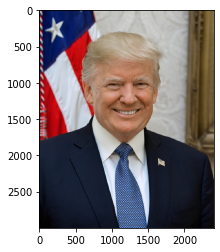

In [71]:
from PIL import Image
import matplotlib.pyplot as plt

img = plt.imread("f8d05506e9250de59fa645f0fb7020e4.jpg")
print("image shape: ", img.shape)
plt.imshow(img)

In [72]:
# convolution function

import numpy as np

def convolution(image, filter):
  # output size will be same as the input size
  img_output = np.zeros_like(image)
  print(img_output.shape)

  # zero padding to the input image
  img_padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
  img_padded[1: -1, 1: -1] = img

  for i in range(img.shape[1]):
    for j in range(img.shape[0]):
      img_output[j, i] = np.sum(filter * img_padded[j: j + 3, i : i + 3, :])
  
  return img_output

(3000, 2405, 3)
total_time:  56.72851514816284
CPU times: user 56.7 s, sys: 48 ms, total: 56.7 s
Wall time: 56.8 s


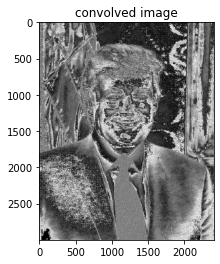

In [73]:
%%time

start_time = time.time()
filter = np.array([[[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]]])
img_result = convolution(img, filter)
total_time = time.time() - start_time

print("total_time: ", total_time)
plt.imshow(img_result)
plt.title("convolved image")

In [74]:
# image convolution - parallel implementation
def convolution_parallel(image, filter):
  # output size will be same as the input size
  img_output = np.zeros_like(image)
  print(img_output.shape)

  # zero padding to the input image
  img_padded = np.zeros((img.shape[0] + 2, img.shape[1] + 2, img.shape[2]))
  img_padded[1: -1, 1: -1] = img
  

  with pymp.Parallel() as p:
    for i in p.range(img.shape[1]):
      for j in range(img.shape[0]):
        img_output[j, i] = np.sum(filter * img_padded[j: j + 3, i : i + 3, :])
  
  return img_output

(3000, 2405, 3)
total_time:  58.29245901107788
CPU times: user 57.6 s, sys: 65.3 ms, total: 57.6 s
Wall time: 58.4 s


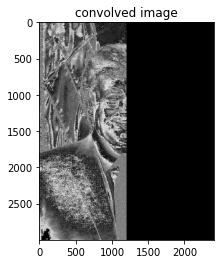

In [77]:
%%time

start_time = time.time()
filter = np.array([[[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]],
                   [[1, 0, -1], [1, 0, -1], [1, 0, -1]]])

img_result = convolution_parallel(img, filter)
total_time = time.time() - start_time

print("total_time: ", total_time)
plt.imshow(img_result)
plt.title("convolved image")